# Tests sur les dimensions d'images

Le but de ce test est de déterminer la dimension idéale des images.

In [2]:
import os
import time

import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

import albumentations as alb

import tensorflow as tf
from tensorflow.keras import layers

import tools

In [7]:
max_image_size = (600, 600)
x_total = []
y_total = []

def load_datasets(img, category):
    new_img = cv2.resize(img, max_image_size)
    x_total.append(new_img)
    category = 0 if category == "NORMAL" else 1
    y_total.append(category)


tools.browse_imgs(load_datasets)

steps = [(100, 100), (200, 200), (400, 400), max_image_size]
results = {}

img_size :  (100, 100)
core_size :  8
ici démarre fit
Epoch 1/2
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.5495 - precision: 0.7641 - recall: 0.9759 - val_loss: 0.2589 - val_precision: 0.9547 - val_recall: 0.8897
Epoch 2/2
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.2464 - precision: 0.9318 - recall: 0.9400 - val_loss: 0.1518 - val_precision: 0.9622 - val_recall: 0.9554
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
time of execution for  (100, 100)  size :  14.424567937850952
img_size :  (200, 200)
core_size :  8
ici démarre fit
Epoch 1/2
147/147 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - loss: 0.5223 - precision: 0.7515 - recall: 0.9026 - val_loss: 0.1965 - val_precision: 0.9414 - val_recall: 0.9522
Epoch 2/2
147/147 ━━━━━━━━━━━━━━━━━━━━ 30s 203ms/step - loss: 0.2329 - precision: 0.9266 - recall: 0.9460 - val_loss: 0.2036 - val_precision: 0.9644 - val_recall: 0.9248
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
time of execution for  (200, 200)  size :  64.80860614776611
img_size :  (

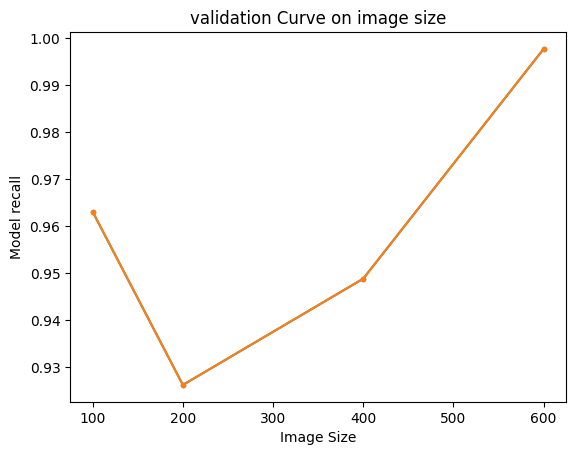

In [9]:
for image_size in steps:
    print("img_size : ", image_size)
    
    num_classes = 1
    core_size = 8
    print("core_size : ", core_size)

    model = tf.keras.Sequential([
        layers.Input(shape=(*image_size, 1)),
        layers.Conv2D(16, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, core_size, activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, core_size, activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(300, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    metrics = ['recall', 'precision']
    model.compile(optimizer='adam',
                  loss=tf.losses.BinaryCrossentropy(),
                  metrics=metrics)
    
    x_train = []
    y_train = y_total
    
    for img in x_total:
        new_img = cv2.resize(img, image_size)
        x_train.append(new_img)        
        
    x_train = np.array(x_train) / 255
    y_train = np.array(y_train)
    
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)
    
    start_time = time.time()
    print("ici démarre fit")
    model.fit(x_train,
              y_train,
              validation_data=(x_val, y_val),
              epochs=2,
              verbose=1)
    
    y_pred = model.predict(x_test, verbose=1)
    y_pred_label = np.round(y_pred).astype(int)
    results[image_size] = recall_score(y_test, y_pred_label)
    print("time of execution for ",image_size," size : ", time.time() - start_time)
    
    
plt.plot(results.keys(), results.values(), marker='.', label='Test Recall')
plt.xlabel('Image Size')
plt.ylabel('Model recall')
plt.title('validation Curve on image size')
plt.show()